In [ ]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

warnings.filterwarnings ('ignore')

In [2]:
heart_data = pd.read_csv('../b. Dataset/Stroke Prediction/Stroke Dataset.csv')
heart_data_untouched = heart_data.copy(deep=True)

In [3]:
heart_data.shape

(4981, 11)

In [4]:
display(heart_data.head(2))
display(heart_data.tail(2))

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
heart_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
categorical_features = heart_data.select_dtypes(include='object').columns

In [8]:
for item in heart_data.columns:
    print("\nFeature", item)
    print("Unique entries in said feature:", heart_data[item].unique())
    print("Distribution of classes:", heart_data[item].value_counts()/len(heart_data)* 100)


Feature gender
Unique entries in said feature: ['Male' 'Female']
Distribution of classes: gender
Female    58.361775
Male      41.638225
Name: count, dtype: float64

Feature age
Unique entries in said feature: [6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16

In [9]:
heart_data[['heart_disease', 'hypertension', 'stroke']] = heart_data[['heart_disease', 'hypertension', 'stroke']].astype('bool')
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


In [10]:
heart_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
heart_data.select_dtypes(include='number').skew()

age                 -0.144001
avg_glucose_level    1.587526
bmi                  0.371553
dtype: float64

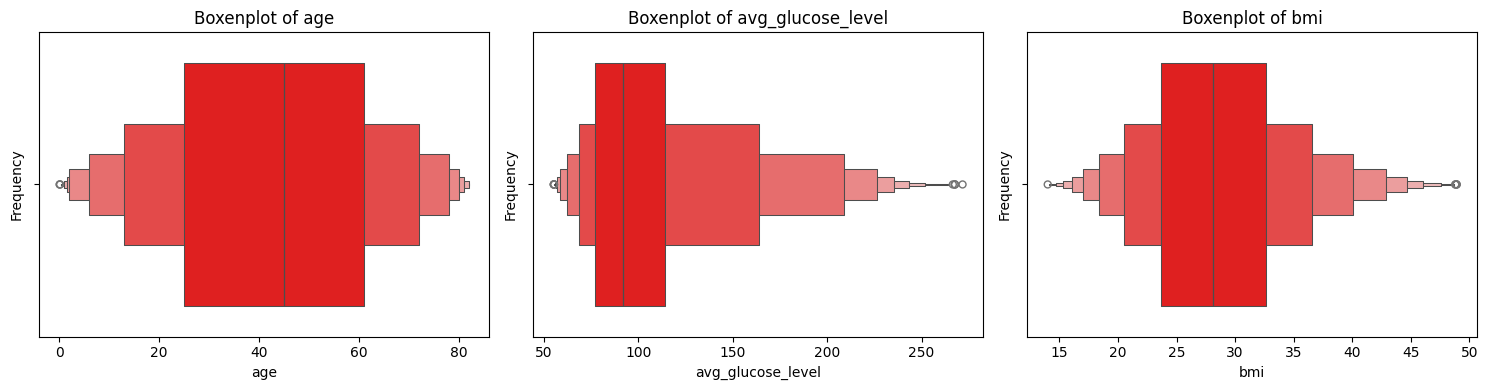

In [12]:
num_columns = heart_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.boxenplot(data=heart_data, x=column,ax=axes[i], color='red')
    axes[i].set_title(f'Boxenplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

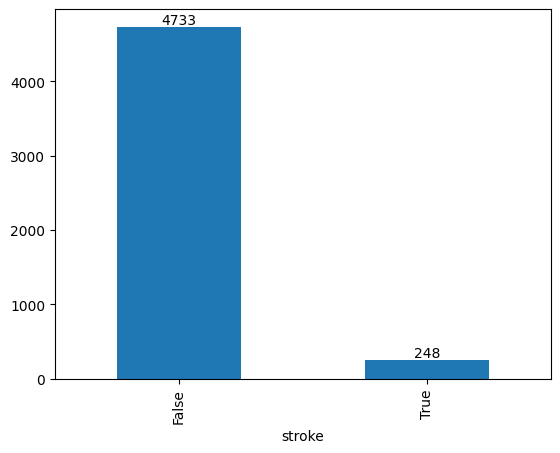

In [13]:
barplot = heart_data['stroke'].value_counts().plot(kind='bar')
plt.bar_label(barplot.containers[0], label_type='edge')
plt.show()

In [14]:
full_num_data = heart_data.copy(deep=True).drop(labels='stroke', axis=1)
num_feature_names = full_num_data.select_dtypes(include='number').columns
num_categorical_names = full_num_data.select_dtypes(include='object').columns
full_num_data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,False,True,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,False,True,Yes,Private,Rural,105.92,32.5,never smoked


In [15]:
full_num_data = pd.get_dummies(data=full_num_data, 
                               columns=heart_data.select_dtypes(include='object').columns)

In [16]:
display(full_num_data.head(2))
display(full_num_data.tail(2))

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,False,True,228.69,36.6,False,True,False,True,False,True,False,False,False,True,False,True,False,False
1,80.0,False,True,105.92,32.5,False,True,False,True,False,True,False,False,True,False,False,False,True,False


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4979,40.0,False,False,83.94,30.0,False,True,False,True,False,True,False,False,True,False,False,False,False,True
4980,80.0,True,False,83.75,29.1,True,False,False,True,False,True,False,False,False,True,False,False,True,False


In [17]:
full_num_data[num_feature_names].skew()

age                 -0.144001
avg_glucose_level    1.587526
bmi                  0.371553
dtype: float64

In [18]:
for feature in num_feature_names:
    quartile_one = full_num_data[feature].quantile(0.25)
    quartile_three = full_num_data[feature].quantile(0.75)
    iqr = quartile_three - quartile_one
    
    upper_bound = quartile_three + 1.5 * iqr
    lower_bound = quartile_one - 1.5 * iqr
    
    full_num_data[feature] = full_num_data[feature].clip(lower=lower_bound, 
                                                         upper=upper_bound)

In [19]:
full_num_data[num_feature_names].skew()

age                 -0.144001
avg_glucose_level    0.934669
bmi                  0.340798
dtype: float64

In [20]:
quartile_one = full_num_data['avg_glucose_level'].quantile(0.35)
quartile_three = full_num_data['avg_glucose_level'].quantile(0.65)
iqr = quartile_three - quartile_one

upper_bound = quartile_three + 1.5 * iqr
lower_bound = quartile_one - 1.5 * iqr

full_num_data['avg_glucose_level'] = full_num_data['avg_glucose_level'].clip(lower=lower_bound, 
                                                                             upper=upper_bound)

In [21]:
full_num_data[num_feature_names].skew()

age                 -0.144001
avg_glucose_level    0.289186
bmi                  0.340798
dtype: float64

In [22]:
correlation_matrix = full_num_data.corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.278120,0.264852,0.141206,0.375655,0.026538,-0.026538,-0.677137,0.677137,0.126868,0.111020,0.326835,-0.636866,-0.017155,0.017155,-0.379669,0.235508,0.122617,0.070899
hypertension,0.278120,1.000000,0.111974,0.114850,0.159678,-0.021485,0.021485,-0.164534,0.164534,0.016378,-0.004177,0.110468,-0.128924,0.004755,-0.004755,-0.139901,0.056797,0.065267,0.030749
heart_disease,0.264852,0.111974,1.000000,0.111796,0.061689,-0.086476,0.086476,-0.114765,0.114765,0.001166,-0.001600,0.087474,-0.092974,-0.002125,0.002125,-0.066710,0.067541,-0.022727,0.044011
avg_glucose_level,0.141206,0.114850,0.111796,1.000000,0.123498,-0.049086,0.049086,-0.094607,0.094607,-0.001628,0.015457,0.032047,-0.055251,0.006088,-0.006088,-0.052491,0.031889,0.016435,0.011192
bmi,0.375655,0.159678,0.061689,0.123498,1.000000,0.010884,-0.010884,-0.373238,0.373238,0.087615,0.212347,0.086264,-0.485990,-0.013341,0.013341,-0.294862,0.120607,0.109424,0.101305
gender_Female,0.026538,-0.021485,-0.086476,-0.049086,0.010884,1.000000,-1.000000,-0.028971,0.028971,0.017176,0.028706,0.029635,-0.090275,-0.004301,0.004301,-0.059858,-0.045109,0.102387,-0.013349
gender_Male,-0.026538,0.021485,0.086476,0.049086,-0.010884,-1.000000,1.000000,0.028971,-0.028971,-0.017176,-0.028706,-0.029635,0.090275,0.004301,-0.004301,0.059858,0.045109,-0.102387,0.013349
ever_married_No,-0.677137,-0.164534,-0.114765,-0.094607,-0.373238,-0.028971,0.028971,1.000000,-1.000000,-0.133655,-0.146139,-0.191668,0.548851,0.008191,-0.008191,0.335689,-0.172039,-0.104120,-0.106234
ever_married_Yes,0.677137,0.164534,0.114765,0.094607,0.373238,0.028971,-0.028971,-1.000000,1.000000,0.133655,0.146139,0.191668,-0.548851,-0.008191,0.008191,-0.335689,0.172039,0.104120,0.106234
work_type_Govt_job,0.126868,0.016378,0.001166,-0.001628,0.087615,0.017176,-0.017176,-0.133655,0.133655,1.000000,-0.447467,-0.169061,-0.152306,-0.013925,0.013925,-0.096437,0.029833,0.045091,0.030804


In [23]:
correlation_matrix[correlation_matrix.abs() > 0.8]

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hypertension,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_Female,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_Male,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married_Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type_Govt_job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


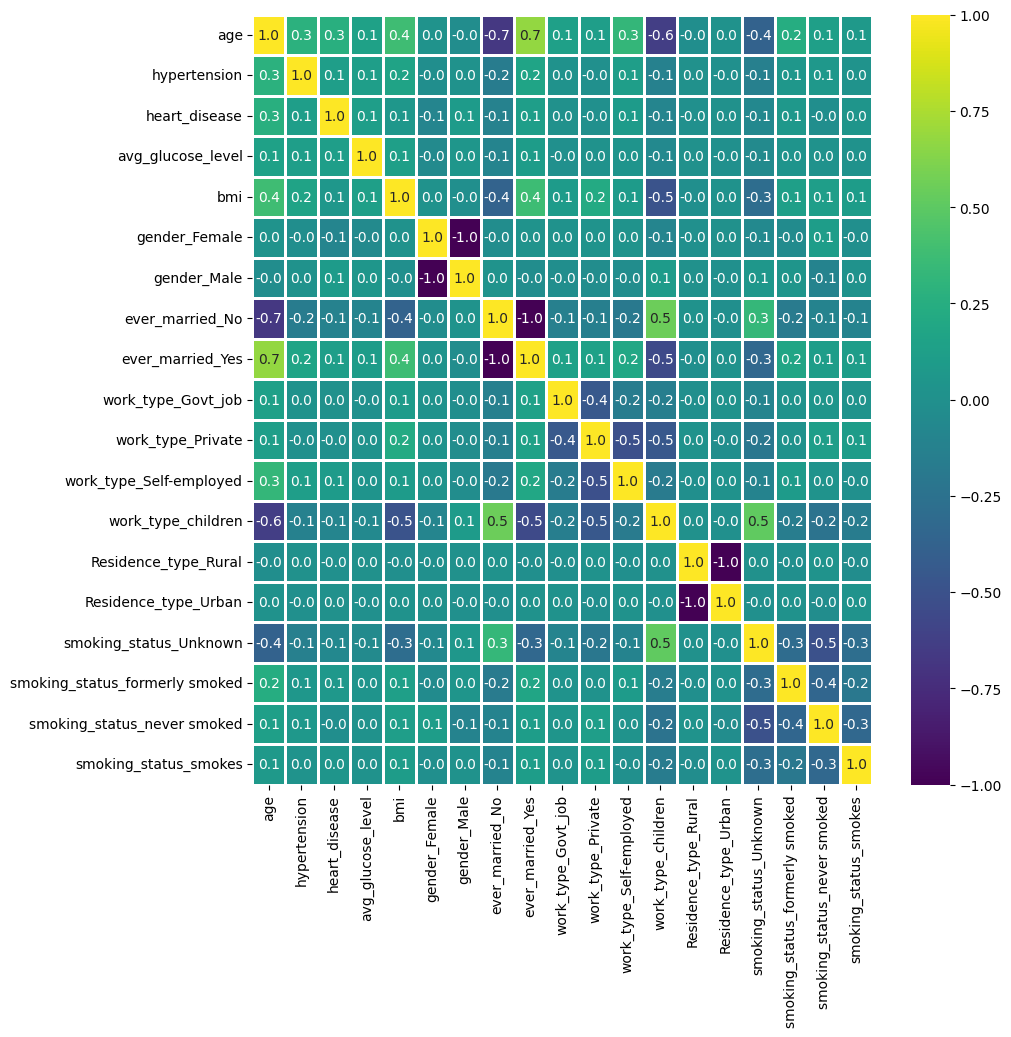

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True, fmt='.1f', linewidths=0.8, cmap='viridis')
plt.show()

In [25]:
corr_trues = correlation_matrix[correlation_matrix.abs() > 0.5].isna() == False
true_pairs = corr_trues.where(corr_trues).stack().index.tolist()
true_pairs

[('age', 'age'),
 ('age', 'ever_married_No'),
 ('age', 'ever_married_Yes'),
 ('age', 'work_type_children'),
 ('hypertension', 'hypertension'),
 ('heart_disease', 'heart_disease'),
 ('avg_glucose_level', 'avg_glucose_level'),
 ('bmi', 'bmi'),
 ('gender_Female', 'gender_Female'),
 ('gender_Female', 'gender_Male'),
 ('gender_Male', 'gender_Female'),
 ('gender_Male', 'gender_Male'),
 ('ever_married_No', 'age'),
 ('ever_married_No', 'ever_married_No'),
 ('ever_married_No', 'ever_married_Yes'),
 ('ever_married_No', 'work_type_children'),
 ('ever_married_Yes', 'age'),
 ('ever_married_Yes', 'ever_married_No'),
 ('ever_married_Yes', 'ever_married_Yes'),
 ('ever_married_Yes', 'work_type_children'),
 ('work_type_Govt_job', 'work_type_Govt_job'),
 ('work_type_Private', 'work_type_Private'),
 ('work_type_Private', 'work_type_Self-employed'),
 ('work_type_Self-employed', 'work_type_Private'),
 ('work_type_Self-employed', 'work_type_Self-employed'),
 ('work_type_children', 'age'),
 ('work_type_childr

In [26]:
full_num_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,False,True,133.455,36.6,False,True,False,True,False,True,False,False,False,True,False,True,False,False
1,80.0,False,True,105.920,32.5,False,True,False,True,False,True,False,False,True,False,False,False,True,False
2,49.0,False,False,133.455,34.4,True,False,False,True,False,True,False,False,False,True,False,False,False,True
3,79.0,True,False,133.455,24.0,True,False,False,True,False,False,True,False,True,False,False,False,True,False
4,81.0,False,False,133.455,29.0,False,True,False,True,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,False,False,70.150,29.8,False,True,True,False,False,True,False,False,True,False,False,True,False,False
4977,40.0,False,False,133.455,31.1,False,True,False,True,False,True,False,False,False,True,False,False,False,True
4978,45.0,True,False,95.020,31.8,True,False,False,True,True,False,False,False,True,False,False,False,False,True
4979,40.0,False,False,83.940,30.0,False,True,False,True,False,True,False,False,True,False,False,False,False,True


In [27]:
X = full_num_data
y = heart_data_untouched['stroke']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=0)

In [29]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_test_pred = log_reg_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9505016722408027

In [31]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495



In [32]:
y_test_prob = log_reg_model.predict_proba(X_test)[:, 1]
y_test_prob

array([0.00306668, 0.03481028, 0.13102485, ..., 0.02784546, 0.03185925,
       0.00151956])

In [34]:
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    y_test_pred = (y_test_prob > threshold).astype(int)
    acc = accuracy_score(y_test, y_test_pred)
    f1_val = f1_score(y_test, y_test_pred)
    print(f"Accuracy for threshold of {threshold} is {round(acc, 4)} and f1 score of {round(f1_val, 4)}")

Accuracy for threshold of 0.3 is 0.9438 and f1 score of 0.0455
Accuracy for threshold of 0.4 is 0.9512 and f1 score of 0.0519
Accuracy for threshold of 0.5 is 0.9505 and f1 score of 0.0
Accuracy for threshold of 0.6 is 0.9505 and f1 score of 0.0
Accuracy for threshold of 0.7 is 0.9505 and f1 score of 0.0


In [35]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=0)

In [37]:
xgb_model = XGBClassifier()
rfc_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
dc_model = DecisionTreeClassifier()

In [38]:
xgb_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
dc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_test_pred_xgb = xgb_model.predict(X_test)
y_test_pred_rfc = rfc_model.predict(X_test)
y_test_pred_gb = gb_model.predict(X_test)
y_test_pred_dc = dc_model.predict(X_test)

In [40]:
print("RFC accuracy:", accuracy_score(y_test, y_test_pred_rfc))
print("XGB accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("DC accuracy:", accuracy_score(y_test, y_test_pred_dc))
print("GB accuracy:", accuracy_score(y_test, y_test_pred_gb))

RFC accuracy: 0.9704225352112676
XGB accuracy: 0.9683098591549296
DC accuracy: 0.9422535211267605
GB accuracy: 0.9602112676056338


In [41]:
print("RFC", classification_report(y_test, y_test_pred_rfc))
print("XGB", classification_report(y_test, y_test_pred_xgb))
print("DC", classification_report(y_test, y_test_pred_dc))
print("GB", classification_report(y_test, y_test_pred_gb))

RFC               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1420
           1       0.98      0.96      0.97      1420

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

XGB               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1420
           1       0.99      0.95      0.97      1420

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840

DC               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1420
           1       0.93      0.95      0.94      1420

    accuracy                           0.94      2840
   macro avg       0.94      0.94      0.94      2840
weighted avg       0.94      0.94      0.94      2840

GB      

In [42]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rfc_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

In [43]:
important_features

,Features,Importance
0,age,0.285327
4,bmi,0.079196
3,avg_glucose_level,0.075015
8,ever_married_Yes,0.055353
1,hypertension,0.055080
13,Residence_type_Rural,0.044337
2,heart_disease,0.042510
16,smoking_status_formerly smoked,0.041975
6,gender_Male,0.041060
10,work_type_Private,0.040817


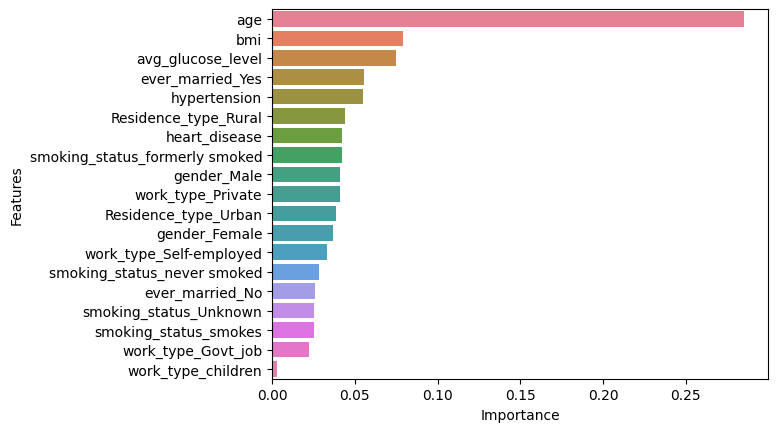

In [44]:
sns.barplot(data=important_features, y='Features', x='Importance', palette='husl')
plt.show()

In [45]:
submission_df = pd.DataFrame({
    'Index': X_test.index,
    'Stroke': y_test_pred_rfc
}).sort_values(by='Index', ascending=True)
submission_df.head(2)

,Index,Stroke
461,1,0
1895,4,1


In [46]:
submission_df.to_csv('../d. Output Files/Stroke Prediction/Stroke Prediction.csv', index=False)